In [61]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
def read_data(path, date="Date"):
    data = pd.read_csv(path)
    data[date] = pd.to_datetime(data[date], dayfirst=True)
    return data

In [63]:
#import csv data
nvda = read_data("NVDA.csv")
nvda['Close'] = nvda['Close'].apply(np.log)
display(nvda)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-15,47.424999,47.615002,45.775002,3.841064,46.258690,156704800
1,2019-04-22,46.337502,48.202499,43.325001,3.795995,44.220131,231328000
2,2019-04-29,44.602501,46.217499,43.875000,3.823246,45.441765,184062800
3,2019-05-06,43.875000,45.084999,41.000000,3.742539,41.918362,262631200
4,2019-05-13,40.875000,41.107498,38.735001,3.666953,38.866745,348726800
...,...,...,...,...,...,...,...
257,2024-03-18,903.880005,947.780029,850.099976,6.848950,942.890015,288579700
258,2024-03-25,939.409973,967.659973,891.229980,6.806343,903.559998,208706300
259,2024-04-01,902.989990,922.250000,858.799988,6.780013,880.080017,208939400
260,2024-04-08,887.000000,907.390015,830.219971,6.782033,881.859985,207522200


In [64]:
searchvol = read_data("ai-timeline_Glimpse_Google-Trends.csv", date='Time (week of)')
searchvol['Absolute Google Search Volume'] = searchvol['Absolute Google Search Volume'].apply(np.log)

display(searchvol)

,Time (week of),Normalized Value (0-100),Absolute Google Search Volume
0,2019-04-14,15,14.123432
1,2019-04-21,14,14.054439
2,2019-04-28,15,14.123432
3,2019-05-05,15,14.123432
4,2019-05-12,15,14.123432
...,...,...,...
257,2024-03-17,98,16.000350
258,2024-03-24,100,16.020552
259,2024-03-31,96,15.979730
260,2024-04-07,97,15.990093


In [65]:
#cleaning data
nvda = nvda.drop(columns=['Open','High','Low','Adj Close'])
display(nvda)

,Date,Close,Volume
0,2019-04-15,3.841064,156704800
1,2019-04-22,3.795995,231328000
2,2019-04-29,3.823246,184062800
3,2019-05-06,3.742539,262631200
4,2019-05-13,3.666953,348726800
...,...,...,...
257,2024-03-18,6.848950,288579700
258,2024-03-25,6.806343,208706300
259,2024-04-01,6.780013,208939400
260,2024-04-08,6.782033,207522200


In [66]:
searchvol = searchvol.rename(columns = {'Time (week of)': 'Date',"Absolute Google Search Volume" : "Search Volume"})
display(searchvol)

,Date,Normalized Value (0-100),Search Volume
0,2019-04-14,15,14.123432
1,2019-04-21,14,14.054439
2,2019-04-28,15,14.123432
3,2019-05-05,15,14.123432
4,2019-05-12,15,14.123432
...,...,...,...
257,2024-03-17,98,16.000350
258,2024-03-24,100,16.020552
259,2024-03-31,96,15.979730
260,2024-04-07,97,15.990093


In [67]:
def scientific_formatter(x, pos):
    # Format the tick label in scientific notation with exponent next to the value
    return "{:.0e}".format(x)

In [68]:
def plot_comparison(nvda, searchvol, important_dates=None):
    # Plotting historical close prices and search volume
    plt.figure(figsize=(14, 8))
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Historical Close Prices and Search Volume')
    # Format x-axis dates
    date_form = DateFormatter("%d/%m/%Y")
    plt.gca().xaxis.set_major_formatter(date_form)

    # Plot Close Price on primary y-axis
    stock = plt.plot(nvda['Date'], nvda['Close'], label='Close Price', color='blue')
    # Create secondary y-axis for Search Volume
    ax2 = plt.twinx()
    search = ax2.plot(searchvol['Date'], searchvol['Search Volume'], label='Search Volume', color='red')
    ax2.set_ylabel('Search Volume')

    # Combine legend for both primary and secondary plots
    lns = stock + search
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc='upper left')

    if important_dates != None:
        for item in important_dates:
            plt.axvline(x=pd.Timestamp(item['date']), color='gray', linestyle='--', linewidth=1)
            y = plt.ylim()[1] - .3 if item['top'] == True else plt.ylim()[0] + .05
            plt.text(pd.Timestamp(item['date']), y, item['name'], rotation=45, fontsize=10, color='dimgray')

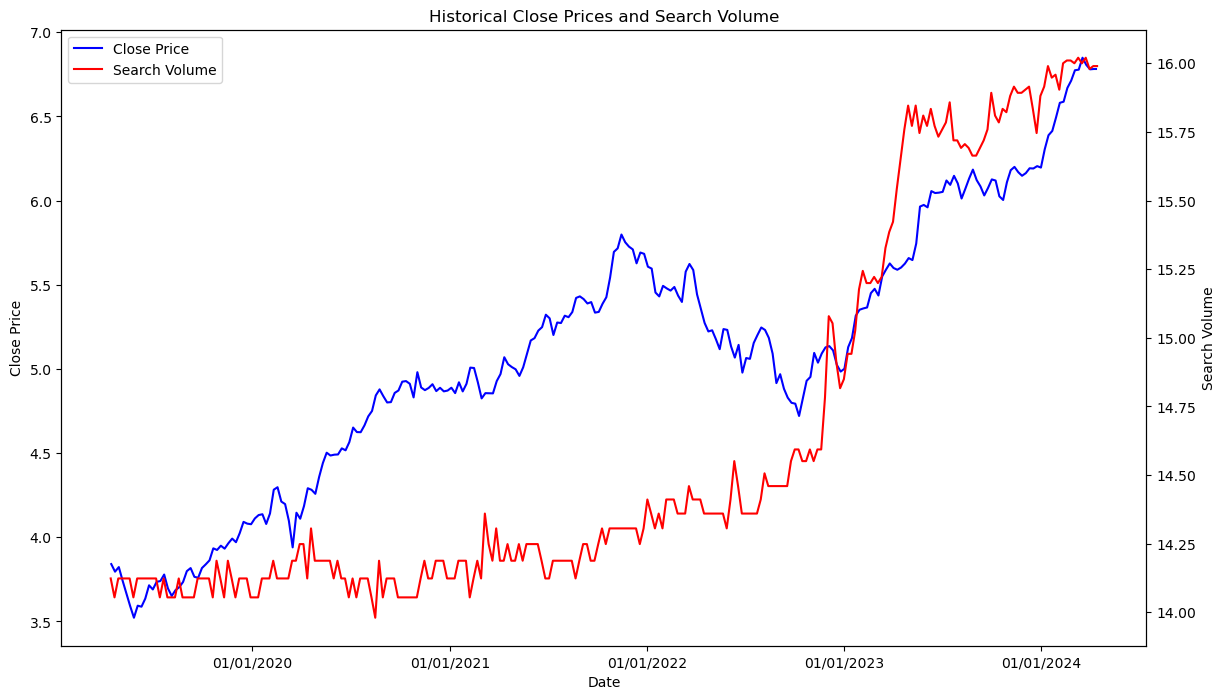

In [69]:
plot_comparison(nvda, searchvol)
plt.show()

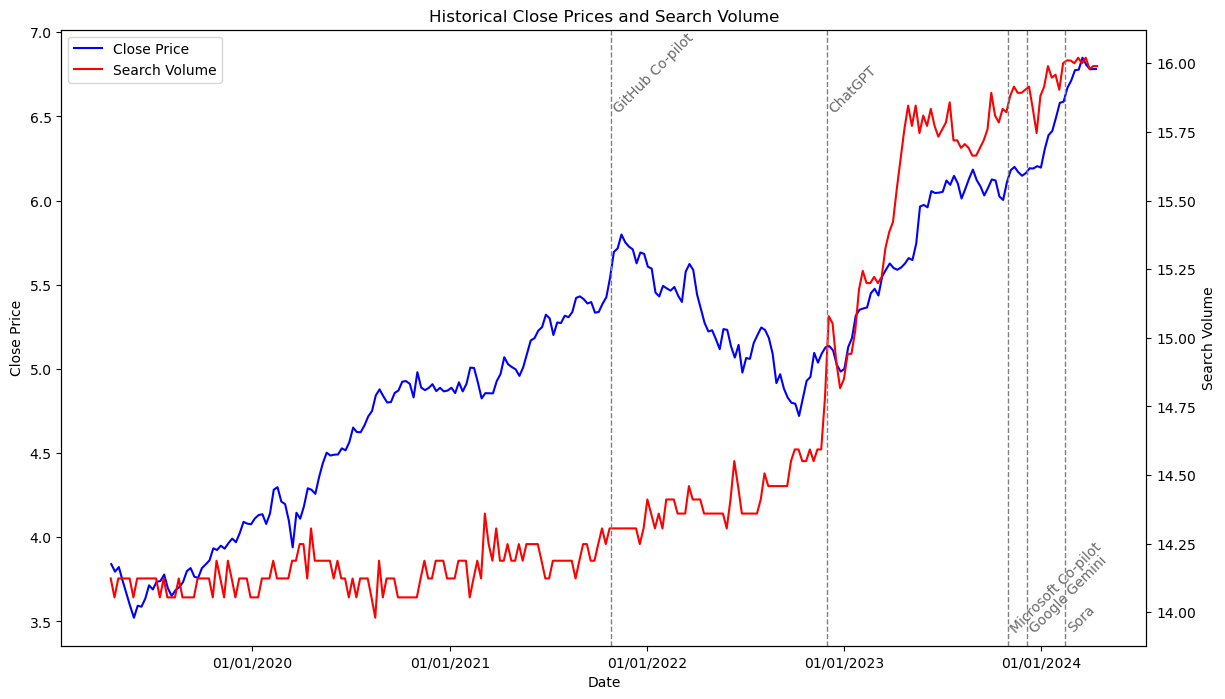

In [70]:
# Dates of major AI releases
important_dates = [
    {'date':'2024-02-15', 'name':'Sora', 'top':False},
    {'date':'2023-12-6', 'name':'Google Gemini', 'top':False},
    {'date':'2023-11-1', 'name':'Microsoft Co-pilot', 'top':False},
    {'date':'2022-11-30', 'name':'ChatGPT', 'top':True},
    {'date':'2021-10-27', 'name':'GitHub Co-pilot', 'top':True}
    ]  # Example dates and corresponding titles

plot_comparison(nvda, searchvol, important_dates)

plt.show()


In [71]:
# def test():
#     x_train, x_test, y_train, y_test = train_test_split(joined['Search Volume'], joined['Close'])
#     plt.scatter(x_train, y_train, label='Trainng dtaa',color='r',alpha=.7)
#     plt.scatter(x_test, y_test, label='Testing dtaa',color='b',alpha=.4)
#     plt.xlabel('search volume')
#     plt.ylabel('stock close price')
#     plt.legend()
#     plt.title('test traiin split')
#     plt.show()

#     LR = LinearRegression()
#     LR.fit(x.values.reshape(-1,1),y)
#     predict = LR.predict(x.values.reshape(-1,1))

#     plt.plot(x,predict,label='linear',color='b')
#     plt.scatter(x,y,label='actual test data',color='g',alpha=.7)
#     plt.xlabel('search volume')
#     plt.ylabel('stock close price')
#     plt.legend()
#     plt.show()
#     b= LR.coef_
#     print(b)
#     #R-squared of model
#     LR.score(x.values.reshape(-1,1),y.values)

In [72]:
def calc_regression(x, y):
    x_reshaped = x.values.reshape(-1, 1)

    # Create and fit the linear regression model
    LR = LinearRegression()
    LR.fit(x_reshaped, y)

    # Predict using the fitted model
    predict = LR.predict(x_reshaped)
    # Display the coefficient (slope) of the linear regression model
    coef = LR.coef_
    print("Coefficient (slope) of the linear regression model:", coef)

    # Calculate R-squared (coefficient of determination) of the model
    r_squared = LR.score(x_reshaped, y)
    print("R-squared of the linear regression model:", r_squared)

    return predict


In [73]:
def plot_regression(x, y, predict):
    # Plotting the linear regression line and actual data
    plt.plot(x, predict, label='Linear Regression', color='r')
    plt.scatter(x, y, label='Actual Data', color='dimgray', alpha=1, linewidths=1, marker='x')
    plt.xlabel('Search Volume')
    plt.ylabel('Stock Close Price')
    plt.legend()
    plt.title('Linear Regression: Search Volume vs. Stock Close Price')
    plt.show()

Coefficient (slope) of the linear regression model: [0.93576106]
R-squared of the linear regression model: 0.6284007055804524


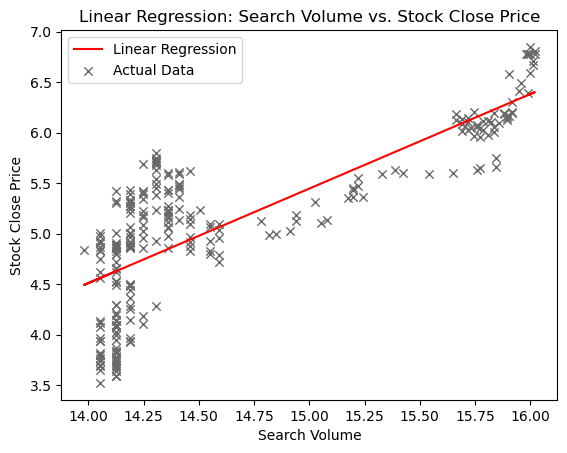

In [74]:
predict = calc_regression(searchvol['Search Volume'], nvda['Close'])
plot_regression(searchvol['Search Volume'], nvda['Close'], predict)

In [75]:

xc= sm.add_constant(searchvol['Search Volume'])

results = sm.OLS(nvda['Close'].values,xc.values).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     439.7
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           8.01e-58
Time:                        00:16:33   Log-Likelihood:                -182.75
No. Observations:                 262   AIC:                             369.5
Df Residuals:                     260   BIC:                             376.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5900      0.653    -13.151      0.000      -9.876      -7.304
x1             0.9358      0.045     20.969      0.000       0.848       1.024
==============================================================================
Omnibus:                       11.969   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.747
Skew:                          -0.210   Prob(JB):                       0.0343
Kurtosis:                       2.335   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""